<a href="https://colab.research.google.com/github/sreelekha24241/sreelekha24241/blob/main/global_Co2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 All libraries employed in this project are imported in google collab and the data set is read as a pandas DataFrame.

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from statsmodels.tsa.arima.model import ARIMA
from shapely.geometry import Point, Polygon
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import  XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression # Import SelectKBest and f_regression

reading the dataset as pandasDataFrame

In [ ]:
# read the dataset as pandasDataFrame

encoding_type='utf-8'
energy=pd.read_csv('global energy.csv',encoding=encoding_type)

To view the data sample

In [ ]:
# to view the data sample
energy.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


To view the shape of dataframe

In [ ]:
# to view the shape of df
energy.shape

(3649, 21)

To check missing values in the dataset

In [ ]:
# check missing values
energy.isnull().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),10
Access to clean fuels for cooking,169
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),2089
Renewable energy share in the total final energy consumption (%),194
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


list the columns to fill and impute with the mean value of the corresponding country

group by entity and fill the missing values with the mean of each country

In [ ]:
# to list the coloumns to fill and impute with the mean value of the corresponding country
columns_to_fill_mean = [
'Access to electricity (% of population)', # Corrected column name
'Access to clean fuels for cooking',
'Renewable-electricity-generating-capacity-per-capita',
'Financial flows to developing countries (US $)',
'Renewable energy share in the total final energy consumption (%)',
'Electricity from fossil fuels (TWh)',
'Electricity from nuclear (TWh)',
'Electricity from renewables (TWh)', # Corrected column name
'Low-carbon electricity (% electricity)',
'Primary energy consumption per capita (kWh/person)', # Added comma and corrected spacing
'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', # Added comma and corrected spacing
'Value_co2_emissions_kt_by_country', # Corrected column name
'Renewables (% equivalent primary energy)', # Corrected column name
'gdp_growth',
'gdp_per_capita'
]
energy[columns_to_fill_mean] = energy.groupby('Entity')[columns_to_fill_mean].transform(lambda group: group.fillna(group.mean()))
print("\nValues after imputation:") # Corrected typo in "after"
print(energy[columns_to_fill_mean].isnull().sum())
print(energy[columns_to_fill_mean].isnull().sum())


Values after imputation:
Access to electricity (% of population)                                1
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      1184
Renewable energy share in the total final energy consumption (%)      21
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           22
Value_co2_emissions_kt_by_country                                    253
Renewables (% equivalent primary energy)                            2137
gdp_growth               

to check missing values

In [ ]:
energy.isnull().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),1
Access to clean fuels for cooking,169
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),1184
Renewable energy share in the total final energy consumption (%),21
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


In [ ]:
# Fill NaN values using forward and backward fill within each group
for column in columns_to_fill_mean:
    energy[column] = energy.groupby('Entity')[column].transform(lambda group: group.fillna(method='ffill').fillna(method='bfill'))

energy[columns_to_fill_mean] = energy.groupby('Entity')[columns_to_fill_mean].transform(lambda group: group.fillna(group.mean()))

print("\nValues after imputation:")
print(energy[columns_to_fill_mean].isnull().sum())

<ipython-input-8-435983221c37>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy[column] = energy.groupby('Entity')[column].transform(lambda group: group.fillna(method='ffill').fillna(method='bfill'))
<ipython-input-8-435983221c37>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy[column] = energy.groupby('Entity')[column].transform(lambda group: group.fillna(method='ffill').fillna(method='bfill'))
<ipython-input-8-435983221c37>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy[column] = energy.groupby('Entity')[column].transform(lambda group: group.fillna(method='ffill').fillna(method='bfill'))
<ipython-input-8-435983221c37>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a f


Values after imputation:
Access to electricity (% of population)                                1
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      1184
Renewable energy share in the total final energy consumption (%)      21
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           22
Value_co2_emissions_kt_by_country                                    253
Renewables (% equivalent primary energy)                            2137
gdp_growth               

In [ ]:
# check duplicate rows
num_duplicates = energy.duplicated().sum()
print("Number of duplicate rows: ",num_duplicates)

Number of duplicate rows:  0


In [ ]:
#clean dataset
energy.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,2.000000e+04,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,6.163893,439.055765,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,1.300000e+05,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,6.163893,439.055765,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3.950000e+06,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,6.163893,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,2.597000e+07,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,3.296947e+07,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9.830000e+06,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,1.062000e+07,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,1.575000e+07,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,1.617000e+07,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9.960000e+06,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


Target selection

In [ ]:
#target selection
target_1=['Primary energy consumption per capita (kWh/person)']
target_2=['Value_co2_emissions_kt_by_country']

In [ ]:
#drop the target variable and entity coloumn from the dataset to get features
features1 = energy.drop(columns=['Entity']+target_1)
features2 = energy.drop(columns=['Entity']+target_2)

Data splitting into train data and test data

In [ ]:
x1=features2
y1=energy[target_1]

x2=features2
y2=energy[target_2]


x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=42)

Feature scaling

In [ ]:
# scaling the data
scaler=StandardScaler()

# Convert columns with commas to numeric
for column in x1_train.select_dtypes(include=['object']).columns:
    x1_train[column] = x1_train[column].str.replace(',', '', regex=True).astype(float)
    x1_test[column] = x1_test[column].str.replace(',', '', regex=True).astype(float)
    x2_train[column] = x2_train[column].str.replace(',', '', regex=True).astype(float)
    x2_test[column] = x2_test[column].str.replace(',', '', regex=True).astype(float)

x1_train_scaled=scaler.fit_transform(x1_train)
x1_test_scaled=scaler.transform(x1_test)

x2_train_scaled=scaler.fit_transform(x2_train)
x2_test_scaled=scaler.transform(x2_test)

enhanced feature selection

In [ ]:
# Impute NaN values in x1_train_scaled and x2_train_scaled if they exist
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'

# Impute NaN values in y2_train_flattened and keep the imputed values
y2_train_flattened = imputer.fit_transform(y2_train_flattened.reshape(-1, 1)).ravel()
y2_test_flattened = imputer.transform(y2_test_flattened.reshape(-1, 1)).ravel()
y1_train_flattened = imputer.fit_transform(y1_train_flattened.reshape(-1, 1)).ravel()
y1_test_flattened = imputer.transform(y1_test_flattened.reshape(-1, 1)).ravel()


x1_train_scaled = imputer.fit_transform(x1_train_scaled)
x1_test_scaled = imputer.transform(x1_test_scaled)

x2_train_scaled = imputer.fit_transform(x2_train_scaled)
x2_test_scaled = imputer.transform(x2_test_scaled)

k_best = SelectKBest(score_func=f_regression, k=10)

# Use the already imputed and flattened y1_train and y2_train
# No need to reassign them with .values.ravel()
# y1_train_flattened = y1_train.values.ravel()
# y2_train_flattened = y2_train.values.ravel()

x1_train_selected = k_best.fit_transform(x1_train_scaled, y1_train_flattened)
x1_test_selected = k_best.transform(x1_test_scaled)

x2_train_selected = k_best.fit_transform(x2_train_scaled, y2_train_flattened)
x2_test_selected = k_best.transform(x2_test_scaled)

y1_train_selected = k_best.fit_transform(x1_train_scaled, y1_train_flattened)
y1_test_selected = k_best.transform(x1_test_scaled)

y2_train_selected = k_best.fit_transform(x2_train_scaled, y2_train_flattened)
y2_test_selected = k_best.transform(x2_test_scaled)

y1_train_flattened = y1_train.values.ravel()
y2_train_flattened = y2_train.values.ravel()

y1_test_flattened = y1_test.values.ravel()
y2_test_flattened = y2_test.values.ravel()

NameError: name 'y2_train_flattened' is not defined

In [ ]:
# Impute NaN values in x1_train_scaled and x2_train_scaled if they exist
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'

# Extract values from DataFrames and flatten them
y2_train_flattened = y2_train.values.ravel()
y2_test_flattened = y2_test.values.ravel()
y1_train_flattened = y1_train.values.ravel()
y1_test_flattened = y1_test.values.ravel()

# Impute NaN values in the flattened arrays
y2_train_flattened = imputer.fit_transform(y2_train_flattened.reshape(-1, 1)).ravel()
y2_test_flattened = imputer.transform(y2_test_flattened.reshape(-1, 1)).ravel()
y1_train_flattened = imputer.fit_transform(y1_train_flattened.reshape(-1, 1)).ravel()
y1_test_flattened = imputer.transform(y1_test_flattened.reshape(-1, 1)).ravel()

# ... (Rest of your code) ...

In [ ]:
# Impute NaN values in x1_train_scaled and x2_train_scaled if they exist
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'

# Impute NaN values in y2_train_flattened and keep the imputed values
y2_train_flattened = imputer.fit_transform(y2_train.values.reshape(-1, 1)).ravel()
y2_test_flattened = imputer.transform(y2_test.values.reshape(-1, 1)).ravel()
y1_train_flattened = imputer.fit_transform(y1_train.values.reshape(-1, 1)).ravel()
y1_test_flattened = imputer.transform(y1_test.values.reshape(-1, 1)).ravel()


x1_train_scaled = imputer.fit_transform(x1_train_scaled)
x1_test_scaled = imputer.transform(x1_test_scaled)

x2_train_scaled = imputer.fit_transform(x2_train_scaled)
x2_test_scaled = imputer.transform(x2_test_scaled)

k_best = SelectKBest(score_func=f_regression, k=10)

# Use the already imputed and flattened y1_train and y2_train
# No need to reassign them with .values.ravel()
# y1_train_flattened = y1_train.values.ravel()
# y2_train_flattened = y2_train.values.ravel()

x1_train_selected = k_best.fit_transform(x1_train_scaled, y1_train_flattened)
x1_test_selected = k_best.transform(x1_test_scaled)

x2_train_selected = k_best.fit_transform(x2_train_scaled, y2_train_flattened)
x2_test_selected = k_best.transform(x2_test_scaled)

#Remove these lines as you don't need to apply feature selection to your target variable:
# y1_train_selected = k_best.fit_transform(x1_train_scaled, y1_train_flattened)
# y1_test_selected = k_best.transform(x1_test_scaled)

# y2_train_selected = k_best.fit_transform(x2_train_scaled, y2_train_flattened)
# y2_test_selected = k_best.transform(x2_test_scaled)

# Remove these lines, as y1_train_flattened and y2_train_flattened
# are already imputed and flattened in the beginning of the code
# y1_train_flattened = y1_train.values.ravel()
# y2_train_flattened = y2_train.values.ravel()

# y1_test_flattened = y1_test.values.ravel()
# y2_test_flattened = y2_test.values.ravel()

1. apply linear regression to energy consumption per capita

In [ ]:
# Import mean_absolute_error for MAE calculation
from sklearn.metrics import mean_absolute_error

model_1=LinearRegression()
model_1.fit(x1_train_selected,y1_train_flattened)

predictions_1=model_1.predict(x1_test_selected)

mse_1=mean_squared_error(y1_test_flattened,predictions_1)
mae_1=mean_absolute_error(y1_test_flattened,predictions_1)
r2_1=r2_score(y1_test_flattened,predictions_1)

print("metrics for primary energy consumption per capita (kwh/person)= Linear Regression")
print("Mean Squared Error:",mse_1)
print("Mean Absolute Error:",mae_1)
print("R-squared:",r2_1)

metrics for primary energy consumption per capita (kwh/person)= Linear Regression
Mean Squared Error: 1.705696558847404e-21
Mean Absolute Error: 3.096965728006692e-11
R-squared: 1.0


2. Linear Regression value Co2_emissions_kt_by_country

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

model_2=LinearRegression()
model_2.fit(x2_train_selected,y2_train_flattened)

predictions_2=model_2.predict(x2_test_selected)

mse_2=mean_squared_error(y2_test_flattened,predictions_2)
mae_2=mean_absolute_error(y2_test_flattened,predictions_2)
r2_2=r2_score(y2_test_flattened,predictions_2)

print("metrics for value Co2_emissions_kt_by_country= Linear Regression")
print("Mean Squared Error:",mse_2)
print("Mean Absolute Error:",mae_2)
print("R-squared:",r2_2)


metrics for value Co2_emissions_kt_by_country= Linear Regression
Mean Squared Error: 10188652275.71754
Mean Absolute Error: 45757.75222133438
R-squared: 0.9641958019074582


3.Random Forest forprimary energy consumption

In [ ]:
model_rf_1=RandomForestRegressor(n_estimators=200,random_state=42,max_depth=10,min_samples_split=2)
model_rf_1.fit(x1_train_selected,y1_train_flattened)

predictions_rf_1=model_rf_1.predict(x1_test_selected)

mse_rf_1=mean_squared_error(y1_test_flattened,predictions_rf_1)
mae_rf_1=mean_absolute_error(y1_test_flattened,predictions_rf_1)
r2_rf_1=r2_score(y1_test_flattened,predictions_rf_1)

print("metrics for primary energy consumption per capita (kwh/person)= Random Forest")
print("Mean Squared Error:",mse_rf_1)
print("Mean Absolute Error:",mae_rf_1)
print("R-squared:",r2_rf_1)

metrics for primary energy consumption per capita (kwh/person)= Random Forest
Mean Squared Error: 55139.78233205008
Mean Absolute Error: 63.16831206308166
R-squared: 0.9999524672726529


4. Random forest for C02 emissions by country

In [ ]:
model_rf_2=RandomForestRegressor(n_estimators=200,random_state=42,max_depth=10,min_samples_split=2)
model_rf_2.fit(x2_train_selected,y2_train_flattened)

predictions_rf_2=model_rf_2.predict(x2_test_selected)

mse_rf_2=mean_squared_error(y2_test_flattened,predictions_rf_2)
mae_rf_2=mean_absolute_error(y2_test_flattened,predictions_rf_2)
r2_rf_2=r2_score(y2_test_flattened,predictions_rf_2)

print("metrics for value Co2_emissions_kt_by_country= Random Forest")
print("Mean Squared Error:",mse_rf_2)
print("Mean Absolute Error:",mae_rf_2)
print("R-squared:",r2_rf_2)


metrics for value Co2_emissions_kt_by_country= Random Forest
Mean Squared Error: 1697309523.3402722
Mean Absolute Error: 11826.179055968238
R-squared: 0.9940354421023017


5. XGBoost for primary energy consumption per capita

In [ ]:
model_xgb_1=XGBRegressor(n_estimators=200,random_state=42,max_depth=10,min_samples_split=2)
model_xgb_1.fit(x1_train_selected,y1_train_flattened)

predictions_xgb_1=model_xgb_1.predict(x1_test_selected)

mse_xgb_1=mean_squared_error(y1_test_flattened,predictions_xgb_1)
mae_xgb_1=mean_absolute_error(y1_test_flattened,predictions_xgb_1)
r2_xgb_1=r2_score(y1_test_flattened,predictions_xgb_1)

print("metrics for primary energy consumption per capita (kwh/person)= XGBoost")
print("Mean Squared Error:",mse_xgb_1)
print("Mean Absolute Error:",mae_xgb_1)
print("R-squared:",r2_xgb_1)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


metrics for primary energy consumption per capita (kwh/person)= XGBoost
Mean Squared Error: 722249.531165628
Mean Absolute Error: 274.8580915023249
R-squared: 0.9993773916292454


6. XGBoost for C02 emissions by country

In [ ]:
model_xgb_2=XGBRegressor(n_estimators=200,random_state=42,max_depth=10,min_samples_split=2)
model_xgb_2.fit(x2_train_selected,y2_train_flattened)

predictions_xgb_2=model_xgb_2.predict(x2_test_selected)

mse_xgb_2=mean_squared_error(y2_test_flattened,predictions_xgb_2)
mae_xgb_2=mean_absolute_error(y2_test_flattened,predictions_xgb_2)
r2_xgb_2=r2_score(y2_test_flattened,predictions_xgb_2)

print("metrics for value Co2_emissions_kt_by_country= XGBoost")
print("Mean Squared Error:",mse_xgb_2)
print("Mean Absolute Error:",mae_xgb_2)
print("R-squared:",r2_xgb_2)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


metrics for value Co2_emissions_kt_by_country= XGBoost
Mean Squared Error: 1214008695.7197626
Mean Absolute Error: 6629.745838302548
R-squared: 0.9957338216428082


7. KNN Regression for primary energy consumption

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_knn_1=KNeighborsRegressor(n_neighbors=4)
model_knn_1.fit(x1_train_selected,y1_train_flattened)

predictions_knn_1=model_knn_1.predict(x1_test_selected)

mse_knn_1=mean_squared_error(y1_test_flattened,predictions_knn_1)
mae_knn_1=mean_absolute_error(y1_test_flattened,predictions_knn_1)
r2_knn_1=r2_score(y1_test_flattened,predictions_knn_1)

print("metrics for primary energy consumption per capita (kwh/person)= KNN")
print("Mean Squared Error:",mse_knn_1)
print("Mean Absolute Error:",mae_knn_1)
print("R-squared:",r2_knn_1)

metrics for primary energy consumption per capita (kwh/person)= KNN
Mean Squared Error: 4656368.801544651
Mean Absolute Error: 1098.5962386219178
R-squared: 0.9959860213567971


8. KNN for C02 emissiosns by country

In [ ]:
model_knn_2=KNeighborsRegressor(n_neighbors=4)
model_knn_2.fit(x2_train_selected,y2_train_flattened)

predictions_knn_2=model_knn_2.predict(x2_test_selected)

mse_knn_2=mean_squared_error(y2_test_flattened,predictions_knn_2)
mae_knn_2=mean_absolute_error(y2_test_flattened,predictions_knn_2)
r2_knn_2=r2_score(y2_test_flattened,predictions_knn_2)

print("metrics for value Co2_emissions_kt_by_country= KNN")
print("Mean Squared Error:",mse_knn_2)
print("Mean Absolute Error:",mae_knn_2)
print("R-squared:",r2_knn_2)


metrics for value Co2_emissions_kt_by_country= KNN
Mean Squared Error: 1966676583.479979
Mean Absolute Error: 7634.861794122705
R-squared: 0.9930888525711393


9.BPNN model for primary energy consumption

In [ ]:
from sklearn.neural_network import MLPRegressor

model_bpnn_1=MLPRegressor(hidden_layer_sizes=(100,50),activation='relu',solver='adam',random_state=42)
model_bpnn_1.fit(x1_train_selected,y1_train_flattened)

predictions_bpnn_1=model_bpnn_1.predict(x1_test_selected)

mse_bpnn_1=mean_squared_error(y1_test_flattened,predictions_bpnn_1)
mae_bpnn_1=mean_absolute_error(y1_test_flattened,predictions_bpnn_1)
r2_bpnn_1=r2_score(y1_test_flattened,predictions_bpnn_1)

print("metrics for primary energy consumption per capita (kwh/person)= BPNN")
print("Mean Squared Error:",mse_bpnn_1)
print("Mean Absolute Error:",mae_bpnn_1)
print("R-squared:",r2_bpnn_1)

metrics for primary energy consumption per capita (kwh/person)= BPNN
Mean Squared Error: 55118710.722837634
Mean Absolute Error: 4740.516824852465
R-squared: 0.9524854372340631


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


10.BPNN for C02 emissions by country

In [ ]:
model_bpnn_2=MLPRegressor(hidden_layer_sizes=(100,50),activation='relu',solver='adam',random_state=42)
model_bpnn_2.fit(x2_train_selected,y2_train_flattened)

predictions_bpnn_2=model_bpnn_2.predict(x2_test_selected)

mse_bpnn_2=mean_squared_error(y2_test_flattened,predictions_bpnn_2)
mae_bpnn_2=mean_absolute_error(y2_test_flattened,predictions_bpnn_2)
r2_bpnn_2=r2_score(y2_test_flattened,predictions_bpnn_2)

print("metrics for value Co2_emissions_kt_by_country= BPNN")
print("Mean Squared Error:",mse_bpnn_2)
print("Mean Absolute Error:",mae_bpnn_2)
print("R-squared:",r2_bpnn_2)

metrics for value Co2_emissions_kt_by_country= BPNN
Mean Squared Error: 76668273471.28041
Mean Absolute Error: 115227.44522910181
R-squared: 0.7305781003714185


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


11. ARIMA model for primary energy consumptions

In [ ]:
model_arima_1=ARIMA(y1_train_flattened,order=(1,1,1))
model_arima_1_fit=model_arima_1.fit()

predictions_arima_1=model_arima_1_fit.forecast(steps=len(y1_test_flattened))

mse_arima_1=mean_squared_error(y1_test_flattened,predictions_arima_1)
mae_arima_1=mean_absolute_error(y1_test_flattened,predictions_arima_1)
r2_arima_1=r2_score(y1_test_flattened,predictions_arima_1)
r2_score(y1_test_flattened,predictions_arima_1)

print("metrics for primary energy consumption per capita (kwh/person)= ARIMA")
print("Mean Squared Error:",mse_arima_1)
print("Mean Absolute Error:",mae_arima_1)
print("R-squared:",r2_arima_1)

metrics for primary energy consumption per capita (kwh/person)= ARIMA
Mean Squared Error: 1161980182.0437965
Mean Absolute Error: 23175.368788718744
R-squared: -0.0016740153832894844


12. ARIMA model for Co2 emissions by country

In [ ]:
model_arima_2=ARIMA(y2_train_flattened,order=(1,1,1))
model_arima_2_fit=model_arima_2.fit()

predictions_arima_2=model_arima_2_fit.forecast(steps=len(y2_test_flattened))

mse_arima_2=mean_squared_error(y2_test_flattened,predictions_arima_2)
mae_arima_2=mean_absolute_error(y2_test_flattened,predictions_arima_2)
r2_arima_2=r2_score(y2_test_flattened,predictions_arima_2)
r2_score(y2_test_flattened,predictions_arima_2)

print("metrics for value Co2_emissions_kt_by_country= ARIMA")
print("Mean Squared Error:",mse_arima_2)
print("Mean Absolute Error:",mae_arima_2)
print("R-squared:",r2_arima_2)

metrics for value Co2_emissions_kt_by_country= ARIMA
Mean Squared Error: 286456760499.7038
Mean Absolute Error: 189352.2756186355
R-squared: -0.0066448751345655754


decision tree for primary energy consumptions

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_decision_tree_1=DecisionTreeRegressor(random_state=42)
model_decision_tree_1.fit(x1_train_selected,y1_train_flattened)

predictions_decision_tree_1=model_decision_tree_1.predict(x1_test_selected)

mse_decision_tree_1=mean_squared_error(y1_test_flattened,predictions_decision_tree_1)
mae_decision_tree_1=mean_absolute_error(y1_test_flattened,predictions_decision_tree_1)
r2_decision_tree_1=r2_score(y1_test_flattened,predictions_decision_tree_1)

print("metrics for primary energy consumption per capita (kwh/person)= Decision Tree")
print("Mean Squared Error:",mse_decision_tree_1)
print("Mean Absolute Error:",mae_decision_tree_1)

metrics for primary energy consumption per capita (kwh/person)= Decision Tree
Mean Squared Error: 316777.22549693886
Mean Absolute Error: 92.66813569726014


decision tree for Co2 emmisions by country

In [ ]:
model_decision_tree_2=DecisionTreeRegressor(random_state=42)
model_decision_tree_2.fit(x2_train_selected,y2_train_flattened)

predictions_decision_tree_2=model_decision_tree_2.predict(x2_test_selected)

mse_decision_tree_2=mean_squared_error(y2_test_flattened,predictions_decision_tree_2)
mae_decision_tree_2=mean_absolute_error(y2_test_flattened,predictions_decision_tree_2)
r2_decision_tree_2=r2_score(y2_test_flattened,predictions_decision_tree_2)
r2_score(y2_test_flattened,predictions_decision_tree_2)

print("metrics for value Co2_emissions_kt_by_country= Decision Tree")
print("Mean Squared Error:",mse_decision_tree_2)
print("Mean Absolute Error:",mae_decision_tree_2)
print("R-squared:",r2_decision_tree_2)


metrics for value Co2_emissions_kt_by_country= Decision Tree
Mean Squared Error: 1710040090.6397433
Mean Absolute Error: 7922.455490711263
R-squared: 0.993990705296973


SVR for primary energy consumption

In [ ]:
model_svr_1=SVR(kernel='rbf')
model_svr_1.fit(x1_train_selected,y1_train_flattened)

predictions_svr_1=model_svr_1.predict(x1_test_selected)

mse_svr_1=mean_squared_error(y1_test_flattened,predictions_svr_1)
mae_svr_1=mean_absolute_error(y1_test_flattened,predictions_svr_1)
r2_svr_1=r2_score(y1_test_flattened,predictions_svr_1)
r2_score(y1_test_flattened,predictions_svr_1)

print("metrics for primary energy consumption per capita (kwh/person)= SVR")
print("Mean Squared Error:",mse_svr_1)
print("Mean Absolute Error:",mae_svr_1)
print("R-squared:",r2_svr_1)

metrics for primary energy consumption per capita (kwh/person)= SVR
Mean Squared Error: 1349098019.5794008
Mean Absolute Error: 21463.86014414008
R-squared: -0.16297717577321613


SVR for C02 emissions by country

In [ ]:
model_svr_2=SVR(kernel='rbf')
model_svr_2.fit(x2_train_selected,y2_train_flattened)

predictions_svr_2=model_svr_2.predict(x2_test_selected)

mse_svr_2=mean_squared_error(y2_test_flattened,predictions_svr_2)
mae_svr_2=mean_absolute_error(y2_test_flattened,predictions_svr_2)
r2_svr_2=r2_score(y2_test_flattened,predictions_svr_2)
r2_score(y2_test_flattened,predictions_svr_2)

print("metrics for value Co2_emissions_kt_by_country= SVR")
print("Mean Squared Error:",mse_svr_2)
print("Mean Absolute Error:",mae_svr_2)
print("R-squared:",r2_svr_2)


metrics for value Co2_emissions_kt_by_country= SVR
Mean Squared Error: 296450407487.19604
Mean Absolute Error: 119824.8889641218
R-squared: -0.04176380026069637


13.Model Evaluation scores for all models

In [ ]:
scores_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'KNN', 'BPNN', 'ARIMA', 'Decision Tree', 'SVR'] * 2,  # Corrected 'decisionTree' to 'Decision Tree'
    'Target': ['Primary energy consumption per capita (kwh/person)'] * 8 + ['Value of C02 emissions by country'] * 8,  # Changed to *8 to match the length of the other lists
    'MSE': [mse_1, mse_rf_1, mse_xgb_1, mse_knn_1, mse_bpnn_1, mse_arima_1, mse_decision_tree_1, mse_svr_1,  # Added mse_decision_tree_1 and mse_svr_1
            mse_2, mse_rf_2, mse_xgb_2, mse_knn_2, mse_bpnn_2, mse_arima_2, mse_decision_tree_2, mse_svr_2],  # Added mse_decision_tree_2 and mse_svr_2
    'MAE': [mae_1, mae_rf_1, mae_xgb_1, mae_knn_1, mae_bpnn_1, mae_arima_1, mae_decision_tree_1, mae_svr_1,  # Added mae_decision_tree_1 and mae_svr_1
            mae_2, mae_rf_2, mae_xgb_2, mae_knn_2, mae_bpnn_2, mae_arima_2, mae_decision_tree_2, mae_svr_2],  # Added mae_decision_tree_2 and mae_svr_2
    'R-squared': [r2_1, r2_rf_1, r2_xgb_1, r2_knn_1, r2_bpnn_1, r2_arima_1, r2_decision_tree_1, r2_svr_1,  # Added r2_decision_tree_1 and r2_svr_1
                  r2_2, r2_rf_2, r2_xgb_2, r2_knn_2, r2_bpnn_2, r2_arima_2, r2_decision_tree_2, r2_svr_2]  # Added r2_decision_tree_2 and r2_svr_2
})
scores_df_target_1 = scores_df[scores_df['Target'] == 'Primary energy consumption per capita (kwh/person)']
scores_df_target_2 = scores_df[scores_df['Target'] == 'Value of C02 emissions by country']

columns_to_print = ['Model', 'MSE', 'MAE', 'R-squared']
scores_df_target_1 = scores_df_target_1[columns_to_print]
scores_df_target_2 = scores_df_target_2[columns_to_print]

print("Scores for Primary energy consumption per capita (kwh/person):")
print(scores_df_target_1)
print("\nScores for Value of C02 emissions by country:")
print(scores_df_target_2)

results_1=pd.DataFrame(scores_df_target_1[columns_to_print])
results_2=pd.DataFrame(scores_df_target_2[columns_to_print])


Scores for Primary energy consumption per capita (kwh/person):
               Model           MSE           MAE  R-squared
0  Linear Regression  1.705697e-21  3.096966e-11   1.000000
1      Random Forest  5.513978e+04  6.316831e+01   0.999952
2            XGBoost  7.222495e+05  2.748581e+02   0.999377
3                KNN  4.656369e+06  1.098596e+03   0.995986
4               BPNN  5.511871e+07  4.740517e+03   0.952485
5              ARIMA  1.161980e+09  2.317537e+04  -0.001674
6      Decision Tree  3.167772e+05  9.266814e+01   0.999727
7                SVR  1.349098e+09  2.146386e+04  -0.162977

Scores for Value of C02 emissions by country:
                Model           MSE            MAE  R-squared
8   Linear Regression  1.018865e+10   45757.752221   0.964196
9       Random Forest  1.697310e+09   11826.179056   0.994035
10            XGBoost  1.214009e+09    6629.745838   0.995734
11                KNN  1.966677e+09    7634.861794   0.993089
12               BPNN  7.666827e+10  115

Top 10 C02 emissions by country

<ipython-input-33-58287136d1ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_co2_emissions_by_country.values, y=average_co2_emissions_by_country.index, palette='viridis')


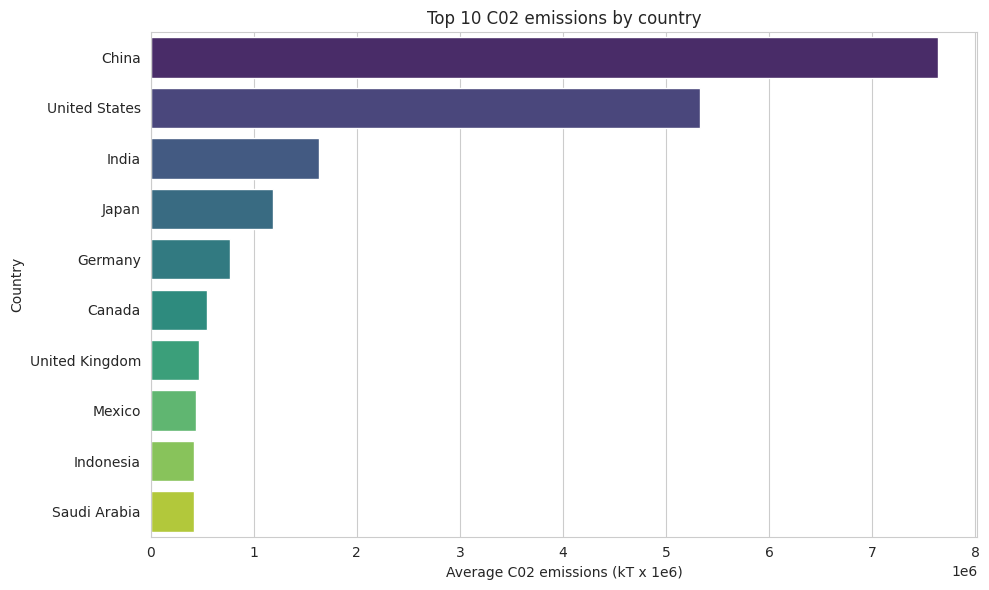

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Calculate the average CO2 emissions by country and get the top 10 countries
average_co2_emissions_by_country = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean().sort_values(ascending=False)[:10]


# Use the index (country names) for the y-axis and the values (average emissions) for the x-axis
sns.barplot(x=average_co2_emissions_by_country.values, y=average_co2_emissions_by_country.index, palette='viridis')

plt.xlabel('Average C02 emissions (kT x 1e6)')  # Update x-axis label
plt.ylabel('Country')  # Update y-axis label
plt.title('Top 10 C02 emissions by country')
plt.tight_layout()
plt.show()

countries with lowest C02 Emissions by country

<ipython-input-34-0e8183afcbc0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_co2_emissions_by_country.values, y=average_co2_emissions_by_country.index, palette='viridis')


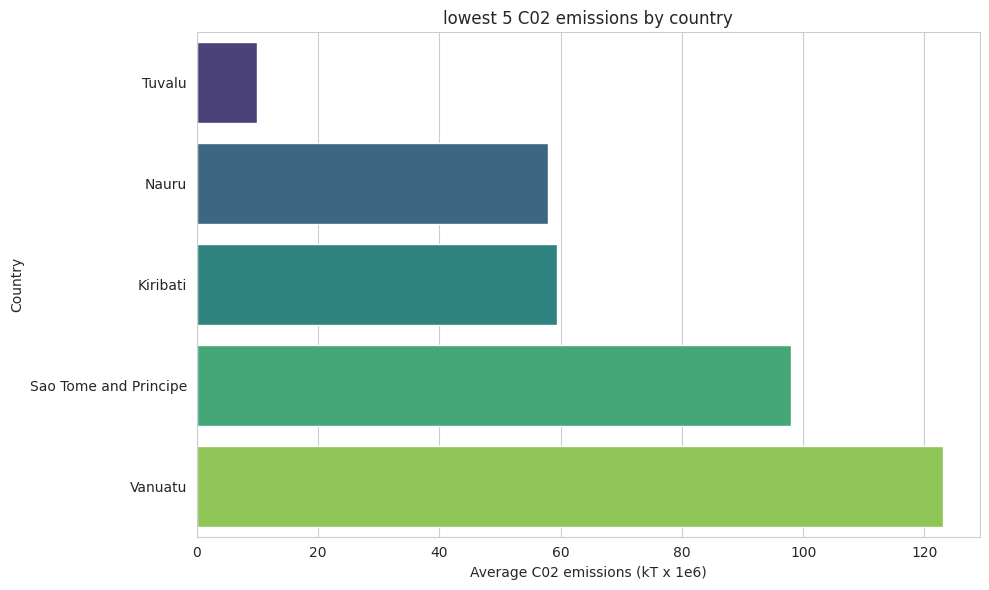

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Calculate the average CO2 emissions by country and get the top 10 countries
# Corrected 'desending' to 'ascending' to sort values in increasing order to get the lowest values
average_co2_emissions_by_country = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean().sort_values(ascending=True)[:5]


# Use the index (country names) for the y-axis and the values (average emissions) for the x-axis
sns.barplot(x=average_co2_emissions_by_country.values, y=average_co2_emissions_by_country.index, palette='viridis')

plt.xlabel('Average C02 emissions (kT x 1e6)')  # Update x-axis label
plt.ylabel('Country')  # Update y-axis label
plt.title('lowest 5 C02 emissions by country')
plt.tight_layout()
plt.show()

Annual growth of Average C02 Emissions

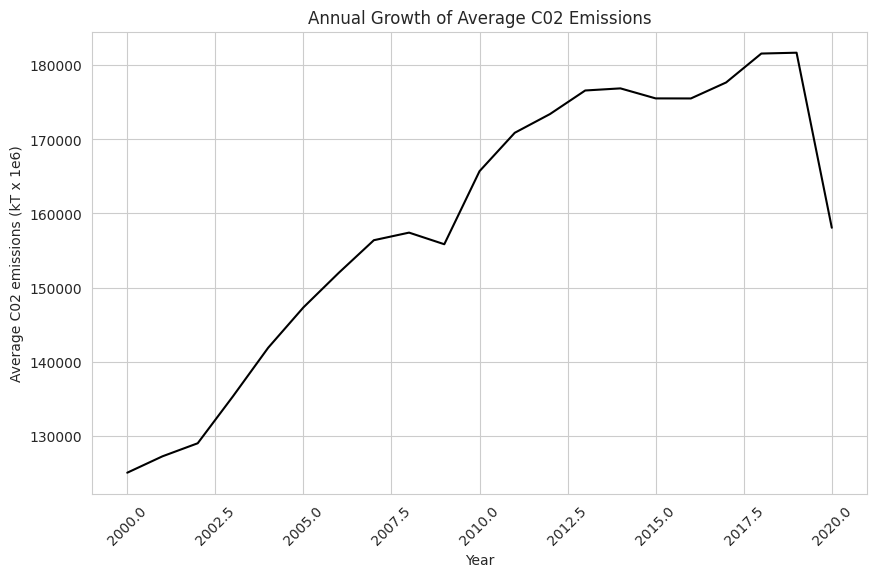

In [ ]:
average_co2_emissions_by_year = energy.groupby('Year')['Value_co2_emissions_kt_by_country'].mean()
average_co2_emissions_by_year=average_co2_emissions_by_year.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value_co2_emissions_kt_by_country', data=average_co2_emissions_by_year, color='black')
plt.xlabel('Year')
plt.ylabel('Average C02 emissions (kT x 1e6)')
plt.title('Annual Growth of Average C02 Emissions')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Average Energy Consumption

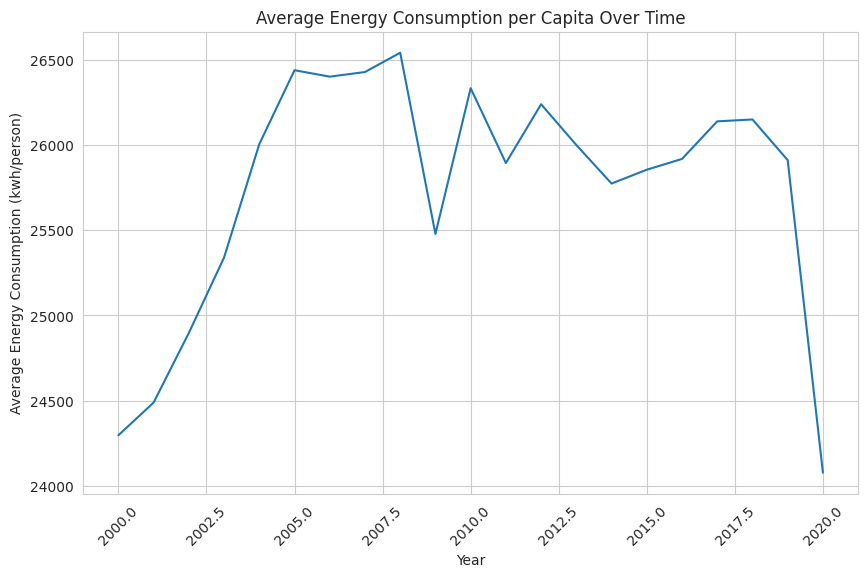

In [ ]:
average_energy_consumption_by_year = energy.groupby('Year')['Primary energy consumption per capita (kWh/person)'].mean()
average_energy_consumption_by_year=average_energy_consumption_by_year.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Primary energy consumption per capita (kWh/person)', data=average_energy_consumption_by_year) # Added data=average_energy_consumption_by_year
plt.xlabel('Year')
plt.ylabel('Average Energy Consumption (kwh/person)')
plt.title('Average Energy Consumption per Capita Over Time')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

correlation matrix

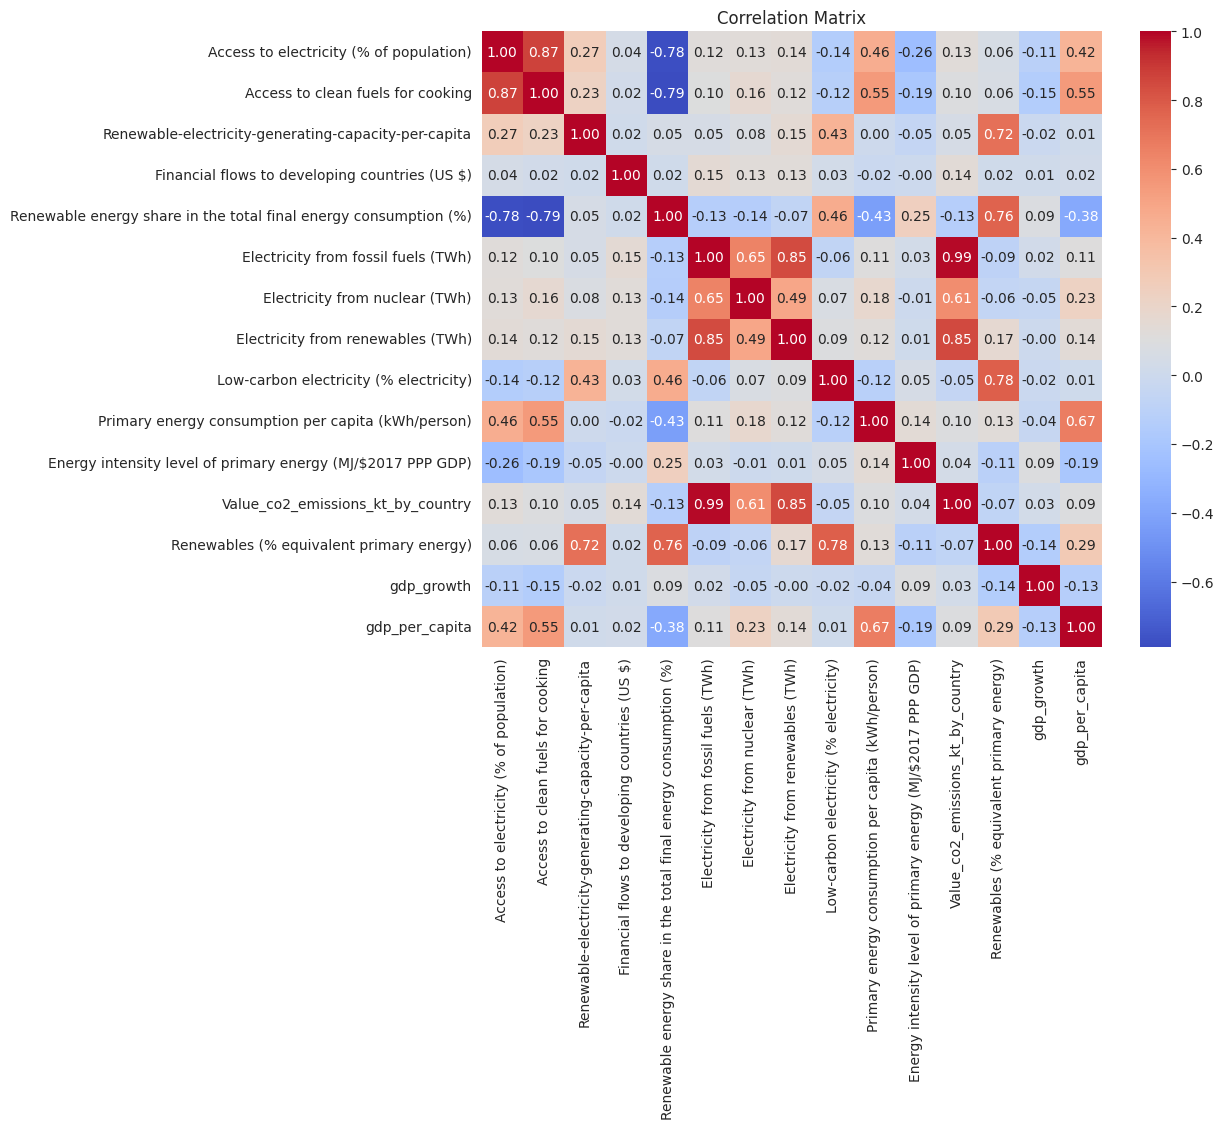

<Axes: >

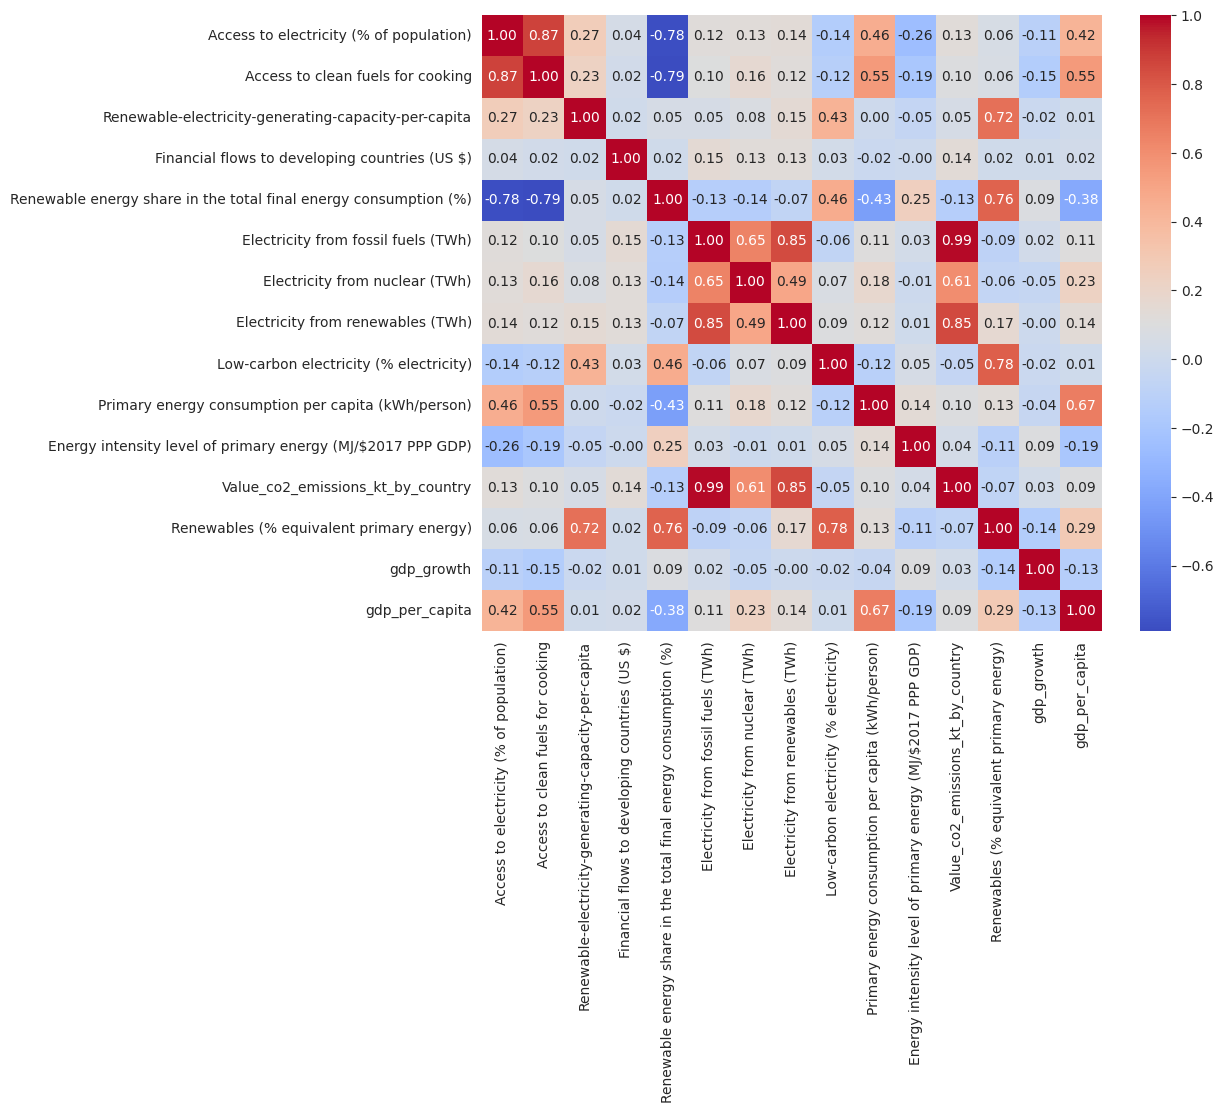

In [ ]:
columns_for_correlation =['Access to electricity (% of population)', # Corrected column name
'Access to clean fuels for cooking',
'Renewable-electricity-generating-capacity-per-capita',
'Financial flows to developing countries (US $)',
'Renewable energy share in the total final energy consumption (%)',
'Electricity from fossil fuels (TWh)',
'Electricity from nuclear (TWh)',
'Electricity from renewables (TWh)', # Corrected column name
'Low-carbon electricity (% electricity)',
'Primary energy consumption per capita (kWh/person)', # Added comma and corrected spacing
'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', # Added comma and corrected spacing
'Value_co2_emissions_kt_by_country', # Corrected column name
'Renewables (% equivalent primary energy)', # Corrected column name
'gdp_growth',
'gdp_per_capita'
]
#Fixed the indentation issue
correlation_data=energy[columns_for_correlation]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.show()

#Fixed the syntax error by adding '.2f' as the argument for fmt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')